In [1]:
import pandas as pd             # for dataframes
import numpy as np              # array math
import matplotlib.pyplot as plt # plots
import seaborn as sns           # fancy plots
from datetime import date
import random

<h1>Data import</h1>
The data is stored in a csv file that includes the date, the number and the word

In [2]:
# read data drom csv
df = pd.read_csv("wordle_word_list.csv")
df.head()

# convert date into datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d/%m/%y')

# output when the spreadsheet was last updated
print('Last updated on: ', df.iloc[-1][0].strftime('%A %B %-d'))

# check if it's up to date
today = date.today()

if today == df.iloc[-1][0].date():
    print('csv-file is up to date')
else:
    print('csv-file is not up to date')

Last updated on:  Wednesday March 30
csv-file is up to date


In [3]:
# alphabet list
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
# add columns for all the letters
df = df.reindex(columns=[*df.columns.tolist(), 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], fill_value=0)

# Add 'true' to the letter column when that letter appears in the word (/!\ does not take into account if the letter is in twice!)
for i in range(len(alphabet)):
    df[alphabet[i]] = df['WORD'].str.contains(alphabet[i])

# replace trues with 1 and falses with 0 to help for calculating the sum of occurences
df = df.replace(True, 1)
df = df.replace(False, 0)
df.head()

,DATE,NR,WORD,a,b,c,d,e,f,g,...,q,r,s,t,u,v,w,x,y,z
0,2021-06-19,1,cigar,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,2021-06-20,2,rebut,0,1,0,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0
2,2021-06-21,3,sissy,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,2021-06-22,4,humph,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2021-06-23,5,awake,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
# function to split worrds into letters
def split_to_letters(word, pos):
    return [char for char in word][pos]

for i in range(5):
    idx = str(i+1)
    df[idx] = df['WORD'].apply(lambda x: split_to_letters(x, i))

df.head()

,DATE,NR,WORD,a,b,c,d,e,f,g,...,v,w,x,y,z,1,2,3,4,5
0,2021-06-19,1,cigar,1,0,1,0,0,0,1,...,0,0,0,0,0,c,i,g,a,r
1,2021-06-20,2,rebut,0,1,0,0,1,0,0,...,0,0,0,0,0,r,e,b,u,t
2,2021-06-21,3,sissy,0,0,0,0,0,0,0,...,0,0,0,1,0,s,i,s,s,y
3,2021-06-22,4,humph,0,0,0,0,0,0,0,...,0,0,0,0,0,h,u,m,p,h
4,2021-06-23,5,awake,1,0,0,0,1,0,0,...,0,1,0,0,0,a,w,a,k,e


[Text(0.5, 1.0, '5th letter')]

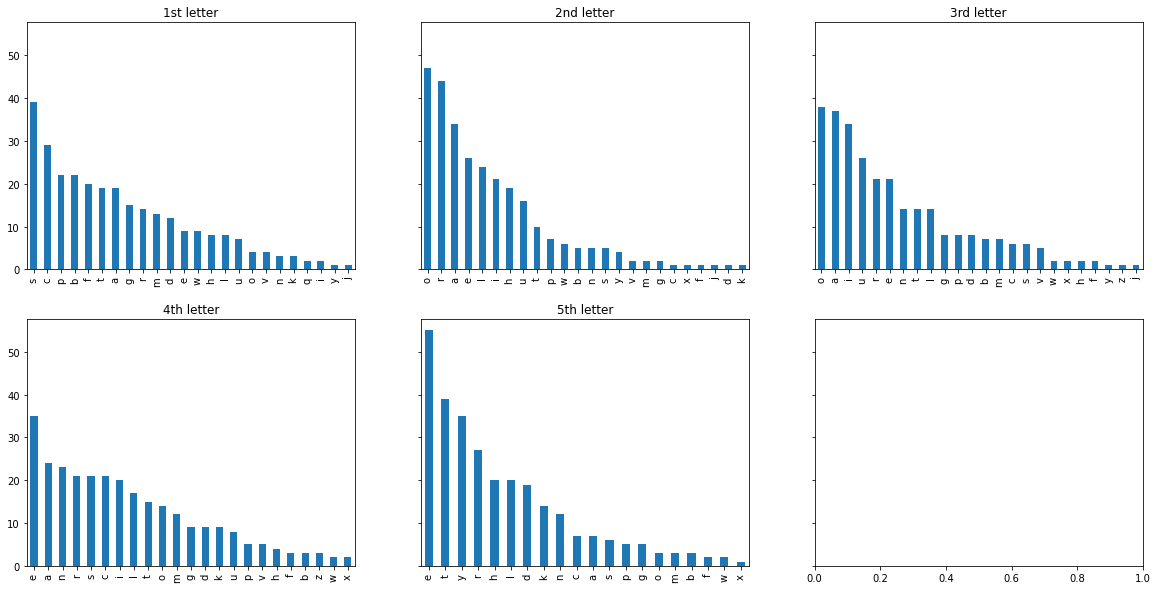

In [5]:
# plot the occurences of each letter
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), sharey=True)
axes = np.reshape(axes, -1)

df['1'].value_counts().plot.bar(ax = axes[0])
axes[0].set(title='1st letter')
df['2'].value_counts().plot.bar(ax = axes[1])
axes[1].set(title='2nd letter')
df['3'].value_counts().plot.bar(ax = axes[2])
axes[2].set(title='3rd letter')
df['4'].value_counts().plot.bar(ax = axes[3])
axes[3].set(title='4th letter')
df['5'].value_counts().plot.bar(ax = axes[4])
axes[4].set(title='5th letter')

In [6]:
# create empty list
sums = []

# sum occurences in a row
for i in range(len(alphabet)):
    sums.append(df[alphabet[i]].sum())

# create dictionary --> each letter corresponds to the number of occurences
letter_occurences = {alphabet[i]: sums[i] for i in range(len(alphabet))}

In [7]:
# function to find doubles
def finder(s):
    yield from {i for i, v in enumerate(s) if v in s[i+1:]}

# check for doubles: create column with the duplicate letters
df['duplicate letter'] = df['WORD'].apply(lambda x: list(set(x[i] for i in finder(x))))

# count the amount of duplicates: create column with the amount of duplicate letter (1 means i.e. 'a' is in twice)
df['duplicates?'] = df['duplicate letter'].apply(lambda x: len(x))
df.head()

,DATE,NR,WORD,a,b,c,d,e,f,g,...,x,y,z,1,2,3,4,5,duplicate letter,duplicates?
0,2021-06-19,1,cigar,1,0,1,0,0,0,1,...,0,0,0,c,i,g,a,r,[],0
1,2021-06-20,2,rebut,0,1,0,0,1,0,0,...,0,0,0,r,e,b,u,t,[],0
2,2021-06-21,3,sissy,0,0,0,0,0,0,0,...,0,1,0,s,i,s,s,y,[s],1
3,2021-06-22,4,humph,0,0,0,0,0,0,0,...,0,0,0,h,u,m,p,h,[h],1
4,2021-06-23,5,awake,1,0,0,0,1,0,0,...,0,0,0,a,w,a,k,e,[a],1


In [8]:
# Calculate amount of words with duplicates
ratio_duplicates = len(df[df['duplicates?'] > 0]) / len(df[df['duplicates?'] == 0])
print('Words with duplicate letters: ', len(df[df['duplicates?'] > 0]))
print('Words without duplicate letters: ', len(df[df['duplicates?'] == 0]))
print('Ratio words with duplicate letters / words without: ', round(ratio_duplicates, 2))

Words with duplicate letters:  92
Words without duplicate letters:  193
Ratio words with duplicate letters / words without:  0.48


In [9]:
# create a list that counts the duplicates
duplicate_letters = []
for i in range(len(df['duplicate letter'])):
    if len(df['duplicate letter'][i]) == 1:
        duplicate_letters.append(df['duplicate letter'][i][0])
    if len(df['duplicate letter'][i]) == 2:
        duplicate_letters.append(df['duplicate letter'][i][0])
        duplicate_letters.append(df['duplicate letter'][i][1])
    if len(df['duplicate letter'][i]) == 3:
        duplicate_letters.append(df['duplicate letter'][i][0])
        duplicate_letters.append(df['duplicate letter'][i][1])
        duplicate_letters.append(df['duplicate letter'][i][2])
duplicate_letters

# counter for duplicates
sum_duplicates = [0]*26
for i in range(len(alphabet)):
    for j in range(len(duplicate_letters)):
        if alphabet[i] == duplicate_letters[j]:
              sum_duplicates[i] = sum_duplicates[i] + 1
total = [x + y for x, y in zip(sum_duplicates, sums)]

# occurence in english: based on wikipedia letter frequency: https://en.wikipedia.org/wiki/Letter_frequency
wikipedia_dictionary = [7.8, 2, 4, 5.8, 11, 1.4, 3, 2.3, 8.2, 0.74, 2.7, 5.6,
                        6.8, 7.2, 6.1, 2.8, 0.24, 7.3, 8.7, 6.7, 3.3, 1, 0.91, 0.27, 1.6, 0.44]

# create dataframe with the occurences of letters
# init empty dataframe
df_letters = pd.DataFrame()
# add letter as column headers
df_letters = df_letters.reindex(columns=['letter', 'occurence without duplicates', 'occurence duplicates', 'total occurence', 'occurence in en'])
df_letters['letter'] = alphabet
df_letters['occurence without duplicates'] = sums
df_letters['occurence duplicates'] = sum_duplicates
df_letters['total occurence'] = df_letters['occurence without duplicates'] + df_letters['occurence duplicates']
df_letters['occurence in en'] = wikipedia_dictionary
df_letters.head()

,letter,occurence without duplicates,occurence duplicates,total occurence,occurence in en
0,a,108,13,121,7.8
1,b,36,4,40,2.0
2,c,58,6,64,4.0
3,d,48,1,49,5.8
4,e,130,16,146,11.0


In [10]:
df_letters['occurence in en'].sum() # fuck up here, should be 100% --> problem in source

107.89999999999999

[Text(0.5, 1.0, 'Occurences of letters in wordle words')]

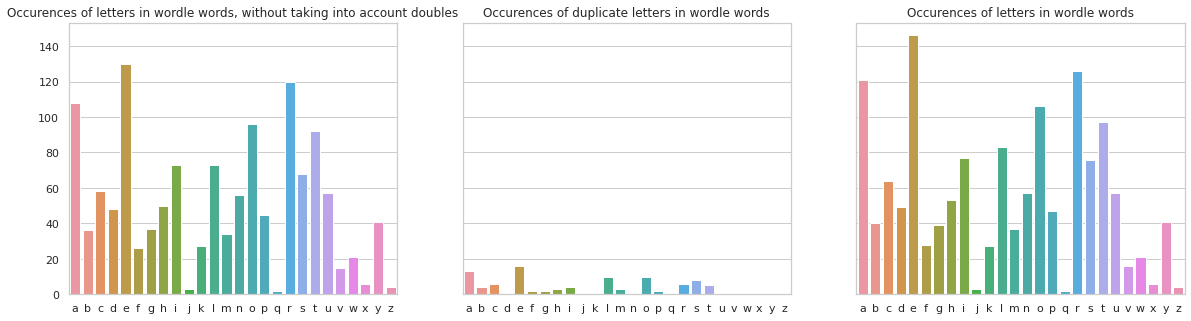

In [11]:
# plot the occurences of each letter
sns.set(style="whitegrid")

#plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharey=True)
axes = np.reshape(axes, -1)
sns.set_color_codes("muted")

sns.barplot(ax=axes[0], x=alphabet, y=sums)
axes[0].set(title='Occurences of letters in wordle words, without taking into account doubles')
sns.barplot(ax=axes[1], x=alphabet, y=sum_duplicates)
axes[1].set(title='Occurences of duplicate letters in wordle words')
sns.barplot(ax=axes[2], x=alphabet, y=total)
axes[2].set(title='Occurences of letters in wordle words')

<h1>Most common letters</h1>
As can be seen in the previous graphs, overall most common letters, and most common letters in specific positions can be viwed. They can be used to build words that contain these letters.<br>
A full list of the allowed words on Wordle can be found here: https://github.com/Kinkelin/WordleCompetition/blob/main/data/official/combined_wordlist.txt<br>
This list is converted into a dataframe.

In [35]:
print('MOST COMMON LETTERS', '\n', '___________________________\n')

# create top 5 most common letter lists for each position
top5_1st = df['1'].value_counts()[0:5].index.tolist()
top5_2nd = df['2'].value_counts()[0:5].index.tolist()
top5_3rd = df['3'].value_counts()[0:5].index.tolist()
top5_4th = df['4'].value_counts()[0:5].index.tolist()
top5_5th = df['5'].value_counts()[0:5].index.tolist()

print('The most common wordle letters so far are: ', df_letters.sort_values('total occurence', ascending=False)[0:5]['letter'].tolist(), '\n')
print('The most common 1st letters are: ', top5_1st)
print('The most common 2nd letters are: ', top5_2nd)
print('The most common 3rd letters are: ', top5_3rd)
print('The most common 4th letters are: ', top5_4th)
print('The most common 5th letters are: ', top5_5th)

MOST COMMON LETTERS 
 ___________________________

The most common wordle letters so far are:  ['e', 'r', 'a', 'o', 't'] 

The most common 1st letters are:  ['s', 'c', 'p', 'b', 'f']
The most common 2nd letters are:  ['o', 'r', 'a', 'e', 'l']
The most common 3rd letters are:  ['o', 'a', 'i', 'u', 'r']
The most common 4th letters are:  ['e', 'a', 'n', 'r', 's']
The most common 5th letters are:  ['e', 't', 'y', 'r', 'h']


In [39]:
# import all allowed words into a dataframe
all_allowed_words = pd.read_csv("all_words.txt")

# split the words by letters
for i in range(5):
    idx = str(i+1)
    all_allowed_words[idx] = all_allowed_words['WORDS'].apply(lambda x: split_to_letters(x, i))
    
# find words with duplicate letters
# check for doubles: create column with the duplicate letters
all_allowed_words['duplicate letter'] = all_allowed_words['WORDS'].apply(lambda x: list(set(x[i] for i in finder(x))))

# count the amount of duplicates: create column with the amount of duplicate letter (1 means i.e. 'a' is in twice)
all_allowed_words['duplicates?'] = all_allowed_words['duplicate letter'].apply(lambda x: len(x))

all_allowed_words

,WORDS,1,2,3,4,5,duplicate letter,duplicates?
0,noles,n,o,l,e,s,[],0
1,melas,m,e,l,a,s,[],0
2,waist,w,a,i,s,t,[],0
3,ohias,o,h,i,a,s,[],0
4,mummy,m,u,m,m,y,[m],1
...,...,...,...,...,...,...,...,...
12967,braid,b,r,a,i,d,[],0
12968,wains,w,a,i,n,s,[],0
12969,doseh,d,o,s,e,h,[],0
12970,vizir,v,i,z,i,r,[i],1


<h1>Best words based on most likely letters, indipendent of position</h1> 

In [44]:
top5 = df_letters.sort_values('total occurence', ascending=False)[0:5]['letter'].tolist()

top5letter_words = all_allowed_words[(all_allowed_words['1'] == top5[0]) |
                                     (all_allowed_words['1'] == top5[1]) |
                                     (all_allowed_words['1'] == top5[2]) |
                                     (all_allowed_words['1'] == top5[3]) |
                                     (all_allowed_words['1'] == top5[4]) ]
                                     
top5letter_words = top5letter_words[(top5letter_words['2'] == top5[0]) |
                                    (top5letter_words['2'] == top5[1]) |
                                     (top5letter_words['2'] == top5[2]) |
                                     (top5letter_words['2'] == top5[3]) |
                                     (top5letter_words['2'] == top5[4]) ]

top5letter_words = top5letter_words[(top5letter_words['3'] == top5[0]) |
                                     (top5letter_words['3'] == top5[1]) |
                                     (top5letter_words['3'] == top5[2]) |
                                     (top5letter_words['3'] == top5[3]) |
                                     (top5letter_words['3'] == top5[4]) ]
                    
top5letter_words = top5letter_words[(top5letter_words['4'] == top5[0]) |
                                     (top5letter_words['4'] == top5[1]) |
                                     (top5letter_words['4'] == top5[2]) |
                                     (top5letter_words['4'] == top5[3]) |
                                     (top5letter_words['4'] == top5[4]) ]
                                        
top5letter_words = top5letter_words[(top5letter_words['5'] == top5[0]) |
                                     (top5letter_words['5'] == top5[1]) |
                                     (top5letter_words['5'] == top5[2]) |
                                     (top5letter_words['5'] == top5[3]) |
                                     (top5letter_words['5'] == top5[4]) ]
# remove words that have more than a pair of suplicate letter
top5letter_words = top5letter_words[top5letter_words['duplicates?'] < 2]
top5letter_words['WORDS'].tolist()

['treat',
 'rarer',
 'rotte',
 'rater',
 'reate',
 'oater',
 'tarot',
 'arett',
 'tetra',
 'torte',
 'orate',
 'tratt',
 'tarre',
 'troat',
 'roate',
 'error',
 'eater',
 'otter',
 'ottar',
 'retro',
 'arret',
 'arete',
 'toter',
 'terra',
 'ratoo',
 'torta',
 'tater',
 'reata',
 'aorta']

<h1>Best words based on most likely letters in each position</h1>
If the following conditions are applied on the allowed words:
<ul>
    <li>remove words with duplicate letters</li>
    <li>all letters must be in their respective top4 list</li>
</ul>
The following words are found. These would be the best words to use based on the position of letters

In [33]:
# filter out words with duplicate letters
high_likelihood = all_allowed_words[all_allowed_words['duplicates?'] == 0]

# 1st letter in top4
high_likelihood = high_likelihood[(high_likelihood['1'] ==  top5_1st[0]) | 
                                  (high_likelihood['1'] ==  top5_1st[1]) | 
                                  (high_likelihood['1'] ==  top5_1st[2]) | 
                                  (high_likelihood['1'] ==  top5_1st[3])]
# 2nd letter in top4
high_likelihood = high_likelihood[(high_likelihood['2'] ==  top5_2nd[0]) |
                                 (high_likelihood['2'] ==  top5_2nd[1]) |
                                 (high_likelihood['2'] ==  top5_2nd[2]) |
                                 (high_likelihood['2'] ==  top5_2nd[3])]
# 3rd letter in top4
high_likelihood = high_likelihood[(high_likelihood['3'] ==  top5_3rd[0]) | 
                                  (high_likelihood['3'] ==  top5_3rd[1]) | 
                                  (high_likelihood['3'] ==  top5_3rd[2]) | 
                                  (high_likelihood['3'] ==  top5_3rd[3])]

high_likelihood = high_likelihood[(high_likelihood['4'] ==  top5_4th[0]) | 
                                  (high_likelihood['4'] ==  top5_4th[1]) | 
                                  (high_likelihood['4'] ==  top5_4th[2]) | 
                                  (high_likelihood['4'] ==  top5_4th[3])]

high_likelihood = high_likelihood[(high_likelihood['5'] ==  top5_5th[0]) | 
                                  (high_likelihood['5'] ==  top5_5th[1]) | 
                                  (high_likelihood['5'] ==  top5_5th[2]) | 
                                  (high_likelihood['5'] ==  top5_5th[3])]

high_likelihood['WORDS'].tolist()

['beany',
 'brane',
 'paire',
 'crony',
 'saine',
 'coure',
 'crone',
 'saunt',
 'prunt',
 'prone',
 'boart',
 'cruet',
 'crane',
 'saury',
 'crine',
 'peony',
 'point',
 'paint',
 'prune',
 'brine',
 'brant',
 'brunt',
 'court',
 'print',
 'peart',
 'count',
 'saint',
 'soare',
 'briny']

<h1>Difference between wordle occurence and english occurence</h1>

<AxesSubplot:xlabel='letter', ylabel='value'>

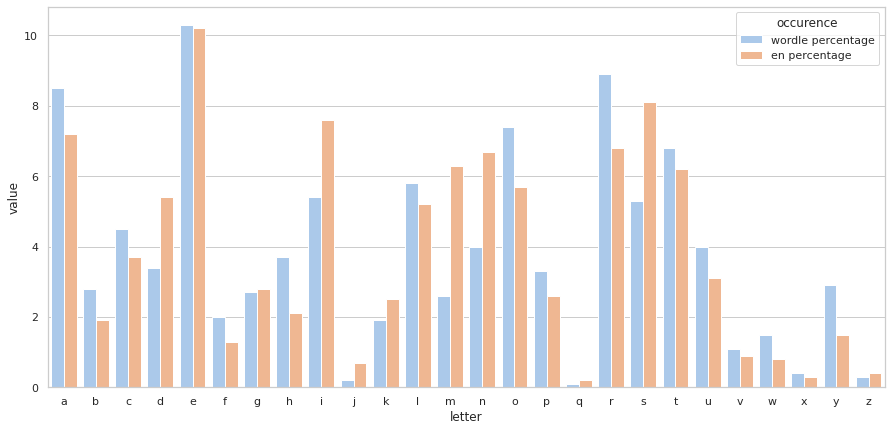

In [14]:
# normalise
df_letters['wordle percentage'] = (df_letters['total occurence'] * 100 / df_letters['total occurence'].sum()).round(1)
df_letters['en percentage'] = (df_letters['occurence in en'] * 100 / df_letters['occurence in en'].sum()).round(1)

# plot wordle words vs english dictionaries
plt.figure(figsize=(15,7))
df1 = pd.melt(df_letters, id_vars=['letter'], value_vars=['wordle percentage', 'en percentage'], var_name='occurence')
sns.set_color_codes("pastel")
sns.barplot(x="letter", y="value", hue="occurence", data=df1, palette='pastel')

In [15]:
# which is letter is more frequent
def letter_more_frequent(s):
    if s['wordle percentage'] > s['en percentage']:
        return 'wordle'
    if s['en percentage'] > s['wordle percentage']:
        return 'English'
    else:
        return 'draw'

df_letters['more frequent'] = df_letters.apply(letter_more_frequent, axis=1)

print('More frequent in Wordle: ', df_letters[df_letters['more frequent'] == 'wordle'].letter.tolist())
print('More frequent in English: ', df_letters[df_letters['more frequent'] == 'English'].letter.tolist())

More frequent in Wordle:  ['a', 'b', 'c', 'e', 'f', 'h', 'l', 'o', 'p', 'r', 't', 'u', 'v', 'w', 'x', 'y']
More frequent in English:  ['d', 'g', 'i', 'j', 'k', 'm', 'n', 'q', 's', 'z']
